<a href="https://colab.research.google.com/github/KCW-colab/welcome/blob/main/prophet_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [ ]:
import fbprophet
print(fbprophet.__version__)

0.7.1


In [ ]:
from pandas import *

In [ ]:
from pandas import read_csv
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header = 0) # 0행을 header로 사용
print(df.shape) 
print(df.head())


(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


Load and Plot Dataset

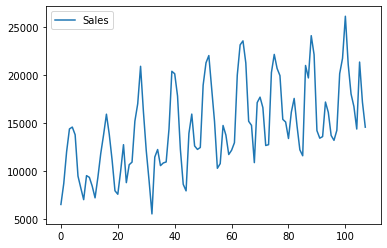

In [ ]:
from matplotlib import pyplot
df.plot()
pyplot.show()

The Prophet() object takes arguments to configure the type of model you want, such as the type of growth, the type of seasonality, and more. 

By default, the model will work hard to figure out almost everything automatically.

The first column must have the name ‘ds‘ and contain the date-times. 

The second column must have the name ‘y‘ and contain the observations.


In [ ]:
# For example, we can modify our loaded car sales dataset to have this expected structure, as follows:

df.columns = ['ds', 'y']
df['ds'] = to_datetime(df['ds'])

In [ ]:
df['ds']

0     1960-01-01
1     1960-02-01
2     1960-03-01
3     1960-04-01
4     1960-05-01
         ...    
103   1968-08-01
104   1968-09-01
105   1968-10-01
106   1968-11-01
107   1968-12-01
Name: ds, Length: 108, dtype: datetime64[ns]

In [ ]:
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(df)

There are many ways to create this “forecast” DataFrame.

 In this case, we will loop over one year of dates, e.g. the last 12 months in the dataset, and create a string for each month. 
 
 We will then convert the list of dates into a DataFrame and convert the string values into date-time objects.

In [ ]:
# define the period for which we want a prediction

future = list()
for i in range(1, 13):
  date = '1968-%02d' % i 
  future.append([date])

future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])


In [ ]:
future['ds']

0    1968-01-01
1    1968-02-01
2    1968-03-01
3    1968-04-01
4    1968-05-01
5    1968-06-01
6    1968-07-01
7    1968-08-01
8    1968-09-01
9    1968-10-01
10   1968-11-01
11   1968-12-01
Name: ds, dtype: datetime64[ns]

The result of the predict() function is a DataFrame that contains many columns. 

Perhaps the most important columns are the forecast date time (‘ds‘), the forecasted value (‘yhat‘), and the lower and upper bounds on the predicted value (‘yhat_lower‘ and ‘yhat_upper‘) that provide uncertainty of the forecast.

In [ ]:
forecast = model.predict(future)
# the forecasted value('yhat'), and the lower and upper bounds
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14663.419982  12998.657449  16185.167390
1 1968-02-01  15225.666899  13786.578527  16820.485464
2 1968-03-01  20717.827765  19090.881700  22157.217135
3 1968-04-01  23264.520345  21582.579582  24773.563860
4 1968-05-01  24695.490912  23087.688065  26291.747272


Next, a plot is created. 

We can see the training data are represented as black dots and the forecast is a blue line with upper and lower bounds in a blue shaded area.

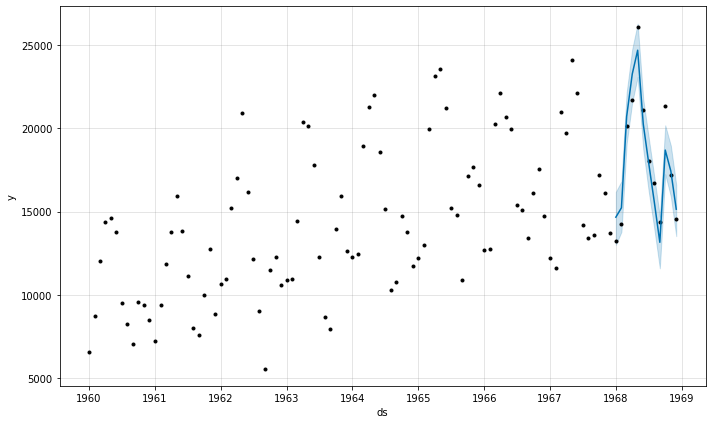

In [ ]:
# plot forecast
model.plot(forecast)
pyplot.show()

In practice, we really want a forecast model to make a prediction beyond the training data.

This is called an out-of-sample forecast.

We can achieve this in the same way as an in-sample forecast and simply specify a different forecast period.

In this case, a period beyond the end of the training dataset, starting 1969-01.

In [ ]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
data = read_csv(path, header= 0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds'] = to_datetime(df['ds'])
print(df['ds'])

0     1960-01-01
1     1960-02-01
2     1960-03-01
3     1960-04-01
4     1960-05-01
         ...    
103   1968-08-01
104   1968-09-01
105   1968-10-01
106   1968-11-01
107   1968-12-01
Name: ds, Length: 108, dtype: datetime64[ns]


In [ ]:
# define the model
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(df)

In [ ]:
future = list()
for i in range(1, 13):
  date = '1969-%02d' % i
  future.append([date])

future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])


Running the example makes an out-of-sample forecast for the car sales data.

The first five rows of the forecast are printed, although it is hard to get an idea of whether they are sensible or not.

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15944.771181  14331.457585  17483.177559
1 1969-02-01  14891.642709  13346.399585  16447.143338
2 1969-03-01  20341.406473  18766.867506  21767.401231
3 1969-04-01  24000.103315  22342.432098  25497.257867
4 1969-05-01  25362.473751  23829.772329  26758.762298


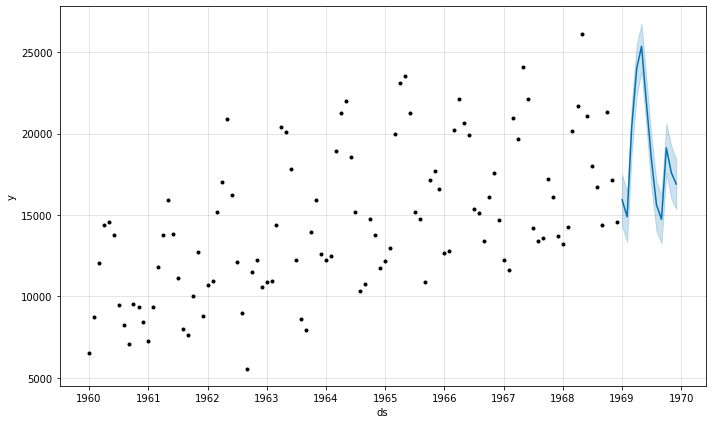

In [ ]:
forecast = model.predict(future)
print(forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].head())
model.plot(forecast)
pyplot.show()

A plot is created to help us evaluate the prediction in the context of the training data.

The new one-year forecast does look sensible, at least by eye.



Then, fitting the model on the first portion of the data, using it to make predictions on the held-pack portion, and calculating an error measure, such as the mean absolute error across the forecasts. 

E.g. a simulated out-of-sample forecast.

The score gives an estimate of how well we might expect the model to perform on average when making an out-of-sample forecast.

We can do this with the samples data by creating a new DataFrame for training with the last 12 months removed.

In [ ]:
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


We can then retrieve the forecast values and the expected values from the original dataset and calculate a mean absolute error metric using the scikit-learn library.

In [ ]:
from sklearn.metrics import mean_absolute_error
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print(mae)

1173.6772606992079


It can also be helpful to plot the expected vs. predicted values to see how well the out-of-sample prediction matches the known values.

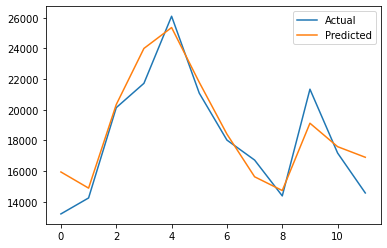

In [ ]:
# plot expected vs actual
pyplot.plot(y_true, label = 'Actual')
pyplot.plot(y_pred, label = 'Predicted')
pyplot.legend()
pyplot.show()

It confirms the training ends in the last month of 1967 and 1968 will be used as the hold-out dataset.